FEVER.jsonl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_json("../../data/raw/FEVER.jsonl",lines=True)
df.head()

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"


In [4]:
df = df[df['label'].isin(['SUPPORTS','REFUTES'])]
df['label'] = df['label'].map({
    'SUPPORTS':'REAL',
    'REFUTES':'FAKE'
})

df = df[['claim','label']]
df = df.rename(columns={'claim':'text'})
df = df.dropna(subset=['text','label'])


In [5]:
df.shape
df.head()

,text,label
0,Nikolaj Coster-Waldau worked with the Fox Broa...,REAL
1,Roman Atwood is a content creator.,REAL
2,"History of art includes architecture, dance, s...",REAL
3,Adrienne Bailon is an accountant.,FAKE
5,Homeland is an American television spy thrille...,REAL


In [6]:
df['label'].value_counts()

label
REAL    80035
FAKE    29775
Name: count, dtype: int64

In [7]:
from sklearn.utils import resample

real_df = df[df['label']=='REAL']
fake_df = df[df['label']=='FAKE']

real_downsampled = resample(real_df, replace=False,
                            n_samples=len(fake_df),
                            random_state=42
                            )

balanced_df = pd.concat([real_downsampled,fake_df]).sample(frac=1, random_state = 42)

df = balanced_df

In [8]:
df['label'].value_counts()


label
FAKE    29775
REAL    29775
Name: count, dtype: int64

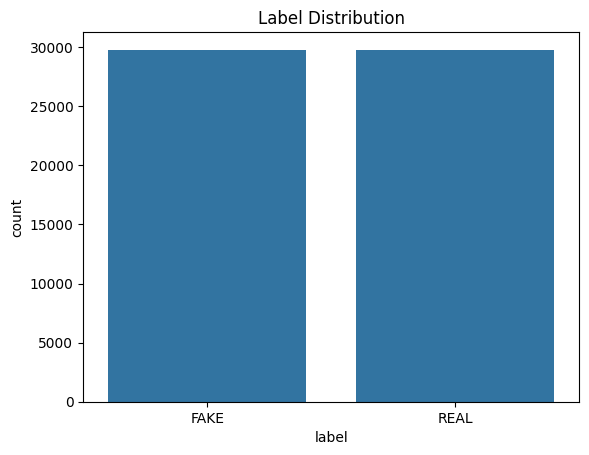

In [9]:
sns.countplot(x='label',data=df)
plt.title('Label Distribution')
plt.show()

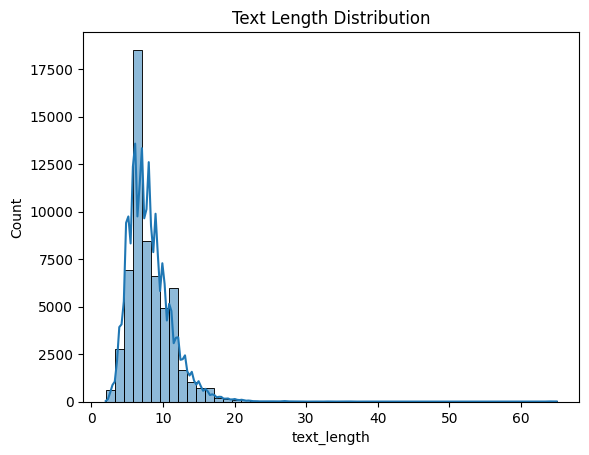

In [10]:
df['text_length']  = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'],bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

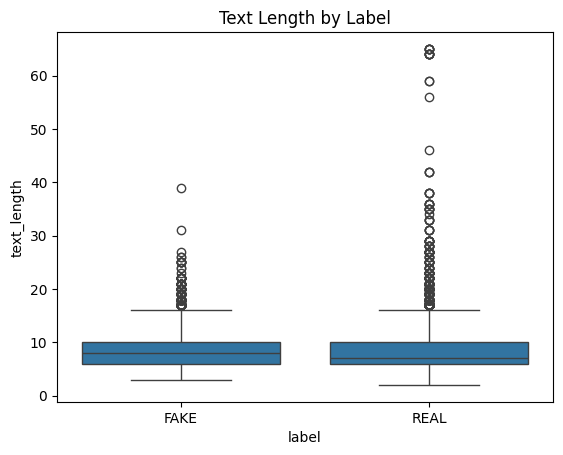

label
FAKE    8.148346
REAL    8.121612
Name: text_length, dtype: float64


In [11]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())

In [12]:
df.to_pickle("../../data/trimmed_processed/FEVER.pkl")